In [1]:
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
import pandas as pd
import datetime
import json
import requests
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure
from sklearn.svm import SVR
from scipy.optimize import fsolve
%matplotlib inline 

In [2]:
PueblaMet = pd.read_csv('Metadata/Puebla.csv')
TolucaMet = pd.read_csv('Metadata/Toluca.csv')
MoreliaMet = pd.read_csv('Metadata/Morelia.csv')
QueretaroMet = pd.read_csv('Metadata/Queretaro.csv')
MonterreyMet = pd.read_csv('Metadata/Monterrey.csv')
GuadalajaraMet = pd.read_csv('Metadata/Guadalajara.csv')
PachucaMet = pd.read_csv('Metadata/Pachuca.csv')
LeonMet = pd.read_csv('Metadata/Leon.csv')
ZacatecasMet = pd.read_csv('Metadata/Zacatecas.csv')
TijuanaMet = pd.read_csv('Metadata/Tijuana.csv')

In [3]:
del PueblaMet['Unnamed: 0']
del TolucaMet['Unnamed: 0']
del MoreliaMet['Unnamed: 0']
del QueretaroMet['Unnamed: 0']
del MonterreyMet['Unnamed: 0']
del GuadalajaraMet['Unnamed: 0']
del PachucaMet['Unnamed: 0']
del LeonMet['Unnamed: 0']
del ZacatecasMet['Unnamed: 0']
del TijuanaMet['Unnamed: 0']

In [4]:
PueblaMet['Distancia al mar (km)'] = 218
TolucaMet['Distancia al mar (km)'] = 317
MoreliaMet['Distancia al mar (km)'] = 220
QueretaroMet['Distancia al mar (km)'] = 330
MonterreyMet['Distancia al mar (km)'] = 290
GuadalajaraMet['Distancia al mar (km)'] = 192
PachucaMet['Distancia al mar (km)'] = 180
LeonMet['Distancia al mar (km)'] = 378
ZacatecasMet['Distancia al mar (km)'] = 317
TijuanaMet['Distancia al mar (km)'] = 16
PueblaMet['Hora'] = ['19.37', '20.48', '21.36', '22.02', '22.39', '23.03', '23.32', '23.53', '00.22', '07.05', '07.29', '08.06', '08.34', '10.26', '10.40']

In [5]:
def city():
    window = Toplevel(root)
    figure = plt.Figure(figsize=(6,5), dpi=100)
    ax = figure.add_subplot(111)
    chart_type = FigureCanvasTkAgg(figure, window)
    chart_type.get_tk_widget().pack()
    y1 = PueblaMet['Temperatura'] 
    x1 = PueblaMet['Hora'] 
    y2 = GuadalajaraMet['Temperatura'] 
    y3 = TijuanaMet['Temperatura'] 
    y4 = MoreliaMet['Temperatura'] 
    y5 = LeonMet['Temperatura'] 
    y6 = MonterreyMet['Temperatura'] 
    y7 = QueretaroMet['Temperatura'] 
    y8 = PachucaMet['Temperatura'] 
    y9 = ZacatecasMet['Temperatura'] 
    #ax.plt.xticks(rotation = 70) 
    ax.plot(x1,y8,'g',x1,y2,'g',x1,y3,'g',x1,y1,'g')
    ax.plot(x1,y4,'r',x1,y5,'r',x1,y6,'r',x1,y7,'r',x1,y9,'r')
    #df.plot(kind='Chart Type such as bar', legend=True, ax=ax)
    ax.set_title('Relación del clima con la distancia al mar.')

In [6]:
def wind():
    Met = var.get()    
    if Met == 'Puebla':
        setWind(PueblaMet,'Puebla')
    if Met == 'Morelia':
        setWind(MoreliaMet,'Morelia')
    if Met == 'Queretaro':
        setWind(QueretaroMet,'Queretaro')
    if Met == 'Monterrey':
        setWind(MonterreyMet,'Monterrey')
    if Met == 'Guadalajara':
        setWind(GuadalajaraMet,'Guadalajara')
    if Met == 'Leon':
        setWind(LeonMet,'Leon')
    if Met == 'Pachuca':
        setWind(PachucaMet,'Pachuca')
    if Met == 'Zacatecas':
        setWind(ZacatecasMet,'Zacatecas')
    if Met == 'Tijuana':
        setWind(TijuanaMet,'Tijuana')

In [7]:
def temper():
    Met = var.get()    
    if Met == 'Puebla':
        setTemp(PueblaMet,'Puebla')
    if Met == 'Morelia':
        setTemp(MoreliaMet,'Morelia')
    if Met == 'Queretaro':
        setTemp(QueretaroMet,'Queretaro')
    if Met == 'Monterrey':
        setTemp(MonterreyMet,'Monterrey')
    if Met == 'Guadalajara':
        setTemp(GuadalajaraMet,'Guadalajara')
    if Met == 'Leon':
        setTemp(LeonMet,'Leon')
    if Met == 'Pachuca':
        setTemp(PachucaMet,'Pachuca')
    if Met == 'Zacatecas':
        setTemp(ZacatecasMet,'Zacatecas')
    if Met == 'Tijuana':
        setTemp(TijuanaMet,'Tijuana')

In [8]:
def hume():
    Met = var.get()    
    if Met == 'Puebla':
        setHum(PueblaMet,'Puebla')
    if Met == 'Morelia':
        setHum(MoreliaMet,'Morelia')
    if Met == 'Queretaro':
        setHum(QueretaroMet,'Queretaro')
    if Met == 'Monterrey':
        setHum(MonterreyMet,'Monterrey')
    if Met == 'Guadalajara':
        setHum(GuadalajaraaMet,'Guadalajara')
    if Met == 'Leon':
        setHum(LeonMet,'Leon')
    if Met == 'Pachuca':
        setHum(PachucaMet,'Pachuca')
    if Met == 'Zacatecas':
        setHum(ZacatecasMet,'Zacatecas')
    if Met == 'Tijuana':
        setHum(TijuanaMet,'Tijuana')

In [9]:
def setHum(ciudad, nombreCiudad):
    window = Toplevel(root)
    figure = plt.Figure(figsize=(6,5), dpi=100)
    ax = figure.add_subplot(111)
    chart_type = FigureCanvasTkAgg(figure, window)
    chart_type.get_tk_widget().pack()
    y1 = ciudad['Humedad'] 
    x1 = PueblaMet['Hora'] 
    #ax.plt.xticks(rotation = 70) 
    ax.plot(x1,y1,'b')
    #df.plot(kind='Chart Type such as bar', legend=True, ax=ax)
    wind = 'Humedad en '
    tit = wind + nombreCiudad
    ax.set_title(tit)

In [10]:
def setTemp(ciudad, nombreCiudad):
    window = Toplevel(root)
    figure = plt.Figure(figsize=(6,5), dpi=100)
    ax = figure.add_subplot(111)
    chart_type = FigureCanvasTkAgg(figure, window)
    chart_type.get_tk_widget().pack()
    y1 = ciudad['Temperatura'] 
    x1 = PueblaMet['Hora'] 
    #ax.plt.xticks(rotation = 70) 
    ax.plot(x1,y1,'b')
    #df.plot(kind='Chart Type such as bar', legend=True, ax=ax)
    wind = 'Temperatura en '
    tit = wind + nombreCiudad
    ax.set_title(tit)

In [11]:
def setWind(ciudad, nombreCiudad):
    hist, bins = np.histogram(ciudad['Grados viento'],8,[0,360])   
    N = 8   
    theta = np.arange(0.,2 * np.pi, 2 * np.pi / N)   
    radii = np.array(hist)   
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)   
    colors = [(1-x/max(hist), 1-x/max(hist), 0.75) for x in radii]    
    plt.bar(theta +np.pi/8, radii, width=(2*np.pi/N), bottom=0.0, color=colors)  
    wind = 'Grados del viento en '
    tit = wind + nombreCiudad
    plt.title(tit,x=0.2, fontsize=20)
    plt.savefig("Assets/polar.jpg")
    pic = "Assets/polar.jpg"
    showGraph(tit, pic)

In [12]:
def showGraph(message, pic):
    window = Toplevel(root)
    window.configure(background = 'white')
    window.geometry('432x350')
    title = Label(window, text = message, borderwidth = 0, bg = 'white')
    title.pack()
    Background = Image.open("Assets/blue.png")
    photoBG = ImageTk.PhotoImage(Background)
    Graph = Image.open(pic)
    photoG = ImageTk.PhotoImage(Graph)
    icon = Label(window, image = photoG, borderwidth = 0)
    icon.image = photoG
    icon.pack()

C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


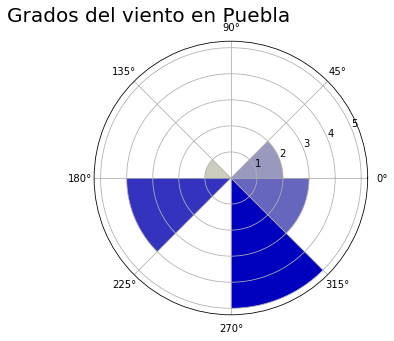

In [13]:
root = Tk()
root.title("Datos meteorológicos")
root.configure(background = 'navy')
root.geometry('700x700')
Background = Image.open("Assets/Background.png")
photoBG = ImageTk.PhotoImage(Background)
icon = Label(root, image = photoBG, borderwidth = 0)
icon.image = photoBG
icon.pack()
message = Label(root, bg = 'navy', fg = 'white', width = 8, borderwidth = 0)
message.pack(side = LEFT)
var = StringVar(root)
var.set("Puebla")
w = OptionMenu(root, var, "Puebla", "Morelia", "Queretaro", "Monterrey", "Guadalajara", "Zacatecas", "Leon", "Pachuca", "Tijuana")
w.config(font=('Helvetica', 10), background = 'cyan')
w.pack(side = LEFT)
Temp = Image.open("Assets/Temp.png")
photoT = ImageTk.PhotoImage(Temp)
button = Button(root, height = 100, width = 100, relief = FLAT, borderwidth = 0, bg = 'navy', image = photoT, command = temper)
button.pack(side = LEFT)
Hum = Image.open("Assets/Hum.png")
photoH = ImageTk.PhotoImage(Hum)
button = Button(root, height = 100, width = 100, relief = FLAT, borderwidth = 0, bg = 'navy', image = photoH, command = hume)
button.pack(side = LEFT)
Wind = Image.open("Assets/Wind.png")
photoW = ImageTk.PhotoImage(Wind)
button = Button(root, height = 100, width = 100, relief = FLAT, borderwidth = 0, bg = 'navy', image = photoW, command = wind)
button.pack(side = LEFT)
General = Image.open("Assets/General.png")
photoG = ImageTk.PhotoImage(General)
button = Button(root, height = 100, width = 100, relief = FLAT, borderwidth = 0, bg = 'navy', image = photoG, command = city)
button.pack(side = LEFT)
root.mainloop()